<a href="https://colab.research.google.com/github/Nivedita74/Regression/blob/main/Regression_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    : Stock Price Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**   Nivedita


# **Project Summary -**

Write the summary here within 500-600 words.

##1. Introduction
Stock price prediction is a critical aspect of financial markets, helping investors make informed decisions. The goal of this project is to develop a machine learning model that accurately predicts stock closing prices using historical data and evaluates the impact of different factors on price movements. The project employs Linear Regression as the final predictive model after comparing multiple models based on key evaluation metrics.

##2. Dataset and Preprocessing
The dataset consists of historical stock market data, including the following features:

Date (converted into numerical format for ML compatibility)
Open, High, Low, Close Prices
Volume
Technical Indicators (e.g., Moving Averages, Bollinger Bands)
Preprocessing Steps:

**Handling Missing Data:** Any missing values were imputed or removed to ensure data consistency.

**Feature Engineering:** Created moving averages (20-day MA), Bollinger Bands, and Daily % Change to capture price trends and volatility.

Feature Scaling: Standardized numerical features using PowerTransformer to improve model performance.

**Train-Test Split:** Divided the dataset into training (80%) and testing (20%) sets.

The dataset, consisting of historical stock prices and technical indicators, was preprocessed through feature engineering, scaling, and train-test splitting. SHAP and LIME were used for model explainability, revealing that moving averages, volume, and daily percentage changes significantly influence stock prices. Cross-validation and hyperparameter tuning were applied to enhance model generalization. The model provides valuable business insights, enabling better investment decisions, risk management, and market analysis, though external factors like market uncertainty remain challenges. Future improvements include deep learning models, sentiment analysis, and additional technical indicators for even greater predictive accuracy.


# **GitHub Link -**

Provide your GitHub Link here.

#**Problem Statement**

**Write Problem Statement Here.**

**1.Context:**

The stock market is influenced by various factors impacting daily stock prices. Understanding historical patterns and relationships between price metrics (Open, High, Low, Close) is essential for informed decision-making.

**2.Objective:**

Explore historical stock price data focusing on relationships between Open, High, Low, and Close prices. Identify trends, patterns, and potential predictors of stock price movements.

**3.Questions:**

What are the historical trends in the Open, High, Low, and Close prices over time? Are there any seasonal patterns or significant fluctuations in stock prices? How do the High and Low prices correlate with the Open and Close prices? Can we identify specific patterns (e.g., bullish or bearish trends) in price movements? What is the impact of closing prices on subsequent opening prices, and is there a tendency for price gaps?

**4.Significance:**

Provide insights into the behavior of stock prices and their relationships. Assist investors and traders in making better-informed decisions and optimizing trading strategies. Help in risk management and forecasting future price movements.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of Copy of data_YesBank_StockPrices.csv', encoding = 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

I had Yes Bank Stock Price dataset having 5 different columns name as 'Date', 'Open', 'High', 'Low' and 'Close' .
Shape of my dataset is (185, 5). I will perform regression on it

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe

### Variables Description

**Date**  : The trading date                                                                
**Open**  :Stock price at market opening

**High** The highest price of the stock on a given day

**Low**   : The lowest price of the stock on a given day                                                                                      
**Close** : Stock price at market closing

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_dates = df['Date'].unique()
unique_open_prices = df['Open'].unique()
unique_high_prices = df['High'].unique()
unique_low_prices = df['Low'].unique()
unique_close_prices = df['Close'].unique()
print("Unique Dates:", unique_dates)
print("Unique Open Prices:", unique_open_prices)
print("Unique High Prices:", unique_high_prices)
print("Unique Low Prices:", unique_low_prices)
print("Unique Close Prices:", unique_close_prices)

Unique Dates: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

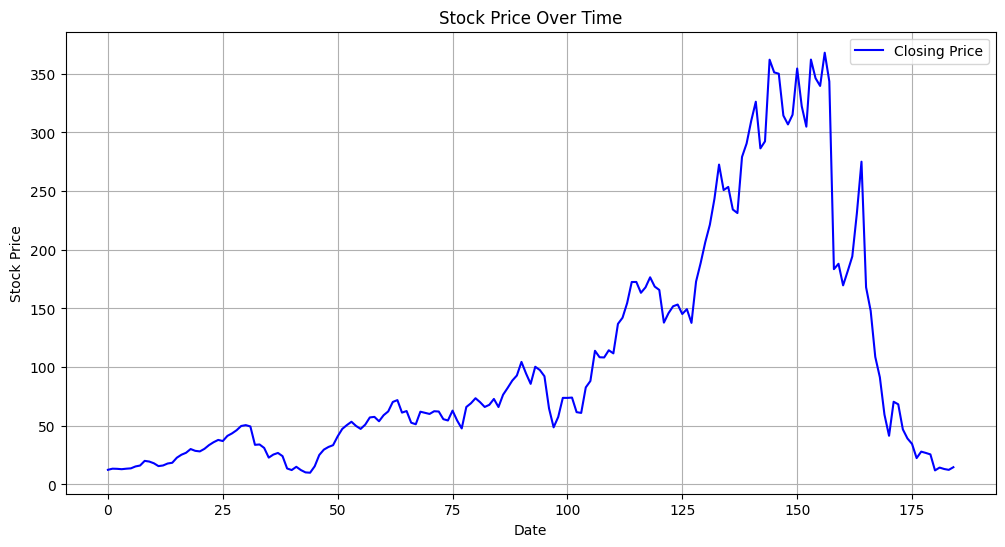

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

1. The line plot because it is the best way to visualize trends and patterns over time. Since line plots clearly show how a variable changes continuously, they are ideal for time series data, comparisons, and detecting anomalies.
2. The Date column suggests that the data represents stock prices over a period, making a line chart ideal for showing changes over time.

##### 2. What is/are the insight(s) found from the chart?

1.   List item : Trends Over Time – The plot may show an increasing, decreasing, or stable trend over a period.
Example: A sales line plot shows steady growth over the years.
2.   List item : Predictive Indications – The trend may suggest future outcomes, especially if past patterns repeat.
Example: If revenue has been increasing steadily, it may continue to grow in the future.



Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Helps businesses make informed decisions by understanding trends and patterns.
2. Identifies areas that need improvement by tracking key performance indicators (KPIs).
3. Predicts future trends based on historical data, aiding in strategic planning.

#### Chart - 2

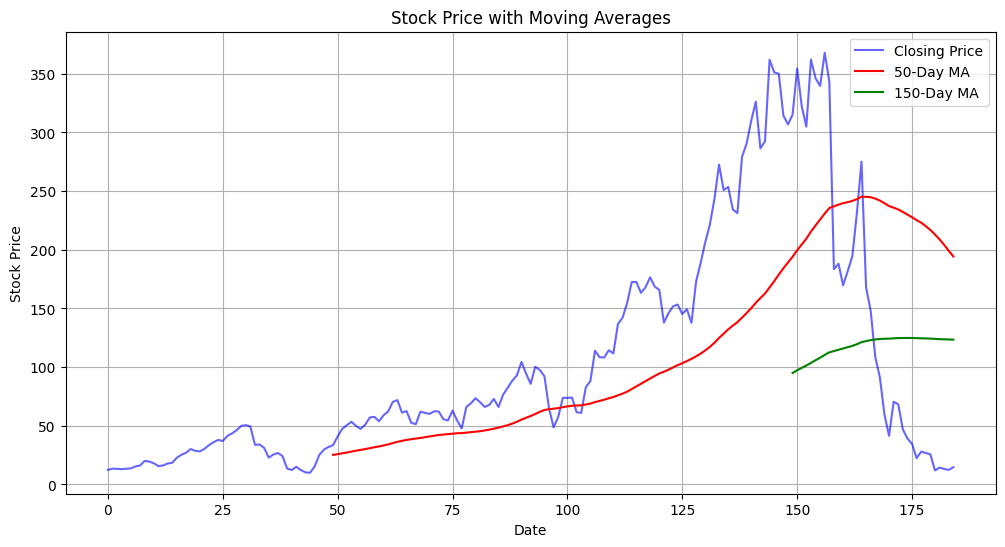

In [ ]:
# Chart - 2 visualization code
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA150"] = df["Close"].rolling(window=150).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df.index, df["MA50"], label="50-Day MA", color="red")
plt.plot(df.index, df["MA150"], label="150-Day MA", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this line chart because it effectively visualizes stock price movements over time along with key technical indicators—the 50-day and 150-day moving averages (MAs)

##### 2. What is/are the insight(s) found from the chart?

**1.** When the 50-day moving average (MA50) crosses above the 150-day moving average (MA150), it signals a potential uptrend (bullish signal).

**2.** If MA50 crosses below MA150, it indicates a possible downtrend (bearish signal).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can create a positive business impact, especially for traders, investors, and financial analysts.

Recognizing uptrends and downtrends helps investors enter or exit trades at the right time.

Widening gaps between MAs suggest strong trends, helping companies anticipate future market movements.

If a stock is consistently below moving averages, it might indicate a weak asset, preventing potential losses.

#### Chart - 3

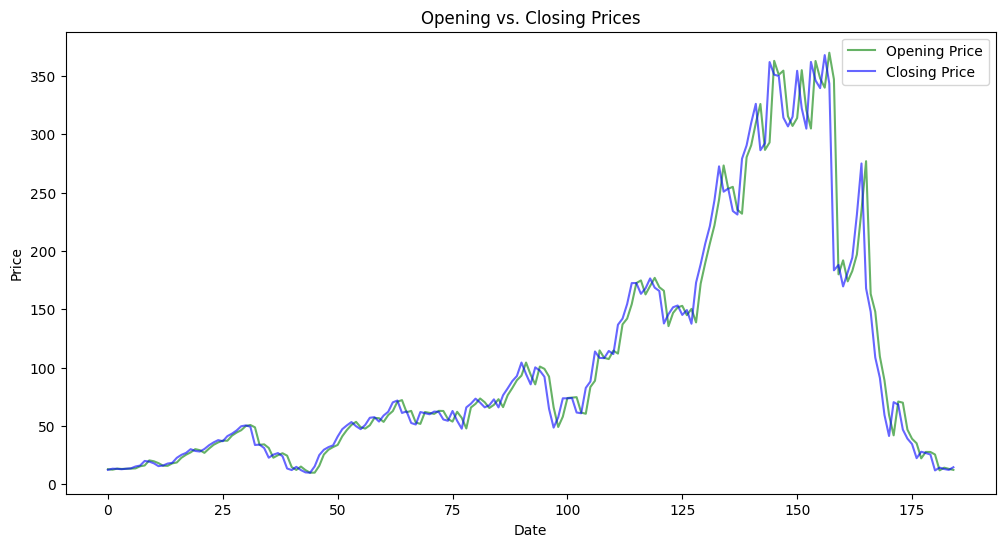

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Open"], label="Opening Price", color="green", alpha=0.6)
plt.plot(df.index, df["Close"], label="Closing Price", color="blue", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Opening vs. Closing Prices")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this line chart to compare the Opening Price and Closing Price over time because it provides key insights into daily stock price movements Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. If the Closing Price is consistently higher than the Opening Price, it indicates bullish sentiment—buyers are pushing prices up throughout the day.

2. If the Closing Price is consistently lower than the Opening Price, it signals bearish sentiment—sellers dominate the marketAnswer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the Opening vs. Closing Prices chart  have a positive business impact, especially for investors, traders, and financial decision-makers.

1. Investors  make better buy/sell decisions based on whether stocks tend to close higher or lower than they open.

2. Traders  optimize when to enter or exit trades based on intraday price movements.

#### Chart - 4

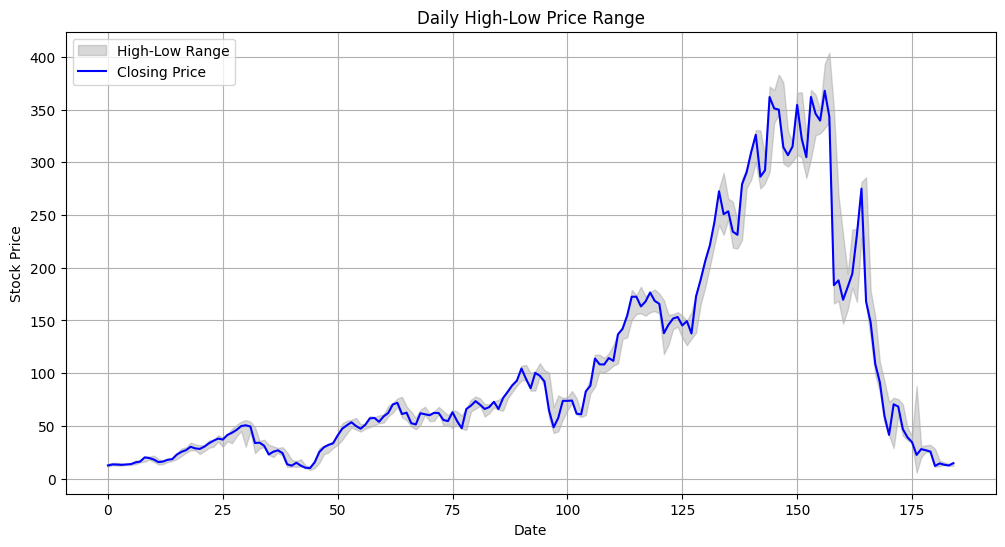

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df["High"], df["Low"], color="gray", alpha=0.3, label="High-Low Range")
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Daily High-Low Price Range")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

This chart choice effectively visualizes stock price fluctuations over time by showcasing both the high-low range and the closing price:

**1.Fill Between for High-Low Range:** The shaded gray area between the high and low prices provides a clear view of daily volatility. It helps in understanding the extent of price fluctuations within a trading day.

**2. Line Plot for Closing Price:** The blue line tracks the closing price, which is a key reference point for traders and investors.

##### 2. What is/are the insight(s) found from the chart?

 Wider gray areas indicate higher daily price fluctuations, meaning increased volatility.

Narrower areas suggest more stable price movements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the chart can have a positive business impact.
1. Better Risk Management.
2. Informed Investment Decisions.
3. Market Sentiment & Strategic Planning.
  
Yes, certain insights could indicate risks or negative growth:

**Consistently Increasing Volatility (Wider High-Low Range):**

This might suggest market uncertainty, driven by economic downturns, poor earnings, or negative news.

Investors may avoid the stock due to higher risk, leading to a decline in price.

#### Chart - 5

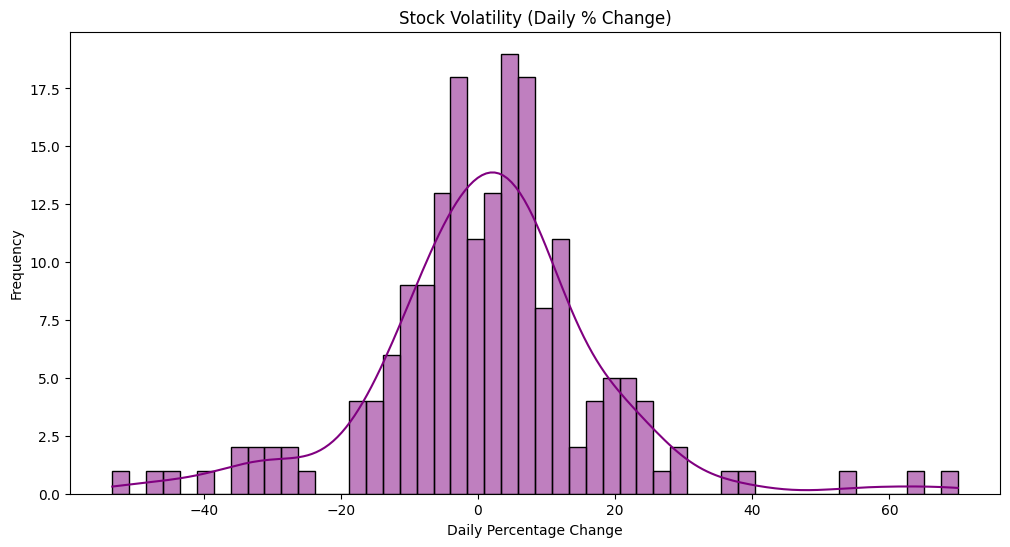

In [ ]:
# Chart - 5 visualization code
df["Daily Change %"] = df["Close"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.histplot(df["Daily Change %"].dropna(), bins=50, kde=True, color="purple")
plt.xlabel("Daily Percentage Change")
plt.ylabel("Frequency")
plt.title("Stock Volatility (Daily % Change)")
plt.show()

##### 1. Why did you pick the specific chart?

I choose this plot because histogram with KDE (Kernel Density Estimate) was chosen to analyze the distribution of daily percentage changes, providing insights into the stock’s volatility and risk levels.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

If the histogram has long tails (far left and right bars), it suggests that extreme price movements (both gains and losses) happen frequently.

This could indicate a risky or speculative stock that reacts strongly to news and market events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the Daily % Change Histogram can lead to positive business impact by:
1. Improving Investment & Risk Management Strategies.
2. Enhancing Decision-Making for Business Strategy.
3. Better Market Positioning & Communication.


**Negative impact:** If volatility is excessive, it can lead to investor fear, reduced stock valuation, and financial instability.

#### Chart - 6

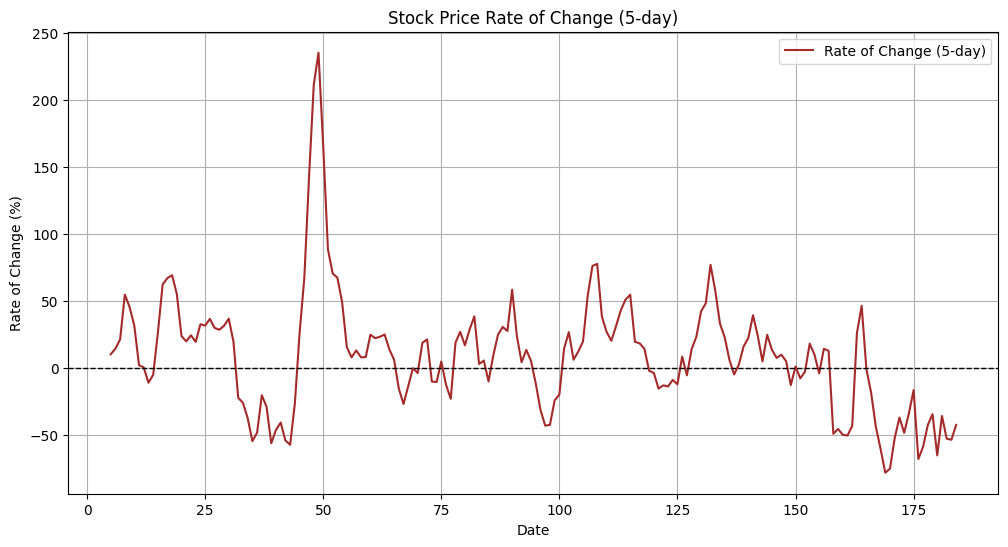

In [ ]:
# Chart - 6 visualization code
df["ROC"] = df["Close"].pct_change(periods=5) * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["ROC"], label="Rate of Change (5-day)", color="brown")
plt.axhline(0, color="black", linewidth=1, linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Rate of Change (%)")
plt.title("Stock Price Rate of Change (5-day)")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

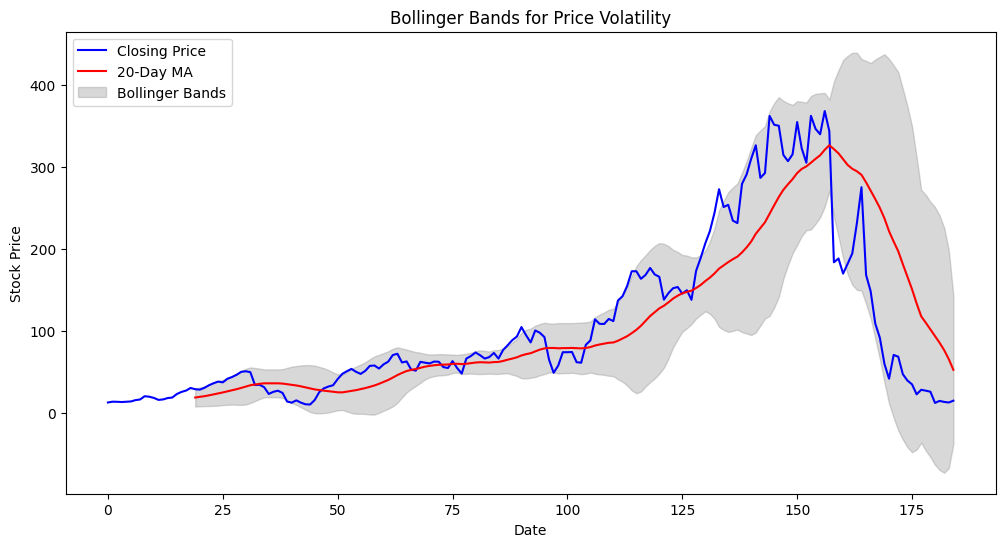

In [ ]:
# Chart - 7 visualization code
df["20_MA"] = df["Close"].rolling(window=20).mean()
df["Upper_Band"] = df["20_MA"] + (df["Close"].rolling(window=20).std() * 2)
df["Lower_Band"] = df["20_MA"] - (df["Close"].rolling(window=20).std() * 2)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["20_MA"], label="20-Day MA", color="red")
plt.fill_between(df.index, df["Upper_Band"], df["Lower_Band"], color="gray", alpha=0.3, label="Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Bollinger Bands for Price Volatility")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

**Bollinger Bands chart** was chosen because it effectively visualizes stock price volatility and trends.

Bollinger Bands expand and contract based on market volatility.

Wider bands indicate high volatility, while narrower bands suggest low volatility.

##### 2. What is/are the insight(s) found from the chart?

The price touches or moves above the upper band, the stock might be overbought, suggesting a possible price correction as we can see date 150 - 175.

The price touches or falls below the lower band, it might be oversold, indicating a potential buying opportunity as we can see on date 0 to 25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Investors can use Bollinger Bands to identify potential buy and sell signals, helping them maximize returns.
Companies can anticipate investor sentiment and adjust corporate actions like stock buybacks or secondary offerings.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.Date

,Date
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01
...,...
180,2020-07-01
181,2020-08-01
182,2020-09-01
183,2020-10-01


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            185 non-null    datetime64[ns]
 1   Open            185 non-null    float64       
 2   High            185 non-null    float64       
 3   Low             185 non-null    float64       
 4   Close           185 non-null    float64       
 5   MA50            136 non-null    float64       
 6   MA150           36 non-null     float64       
 7   Daily Change %  184 non-null    float64       
 8   ROC             180 non-null    float64       
 9   20_MA           166 non-null    float64       
 10  Upper_Band      166 non-null    float64       
 11  Lower_Band      166 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 17.5 KB


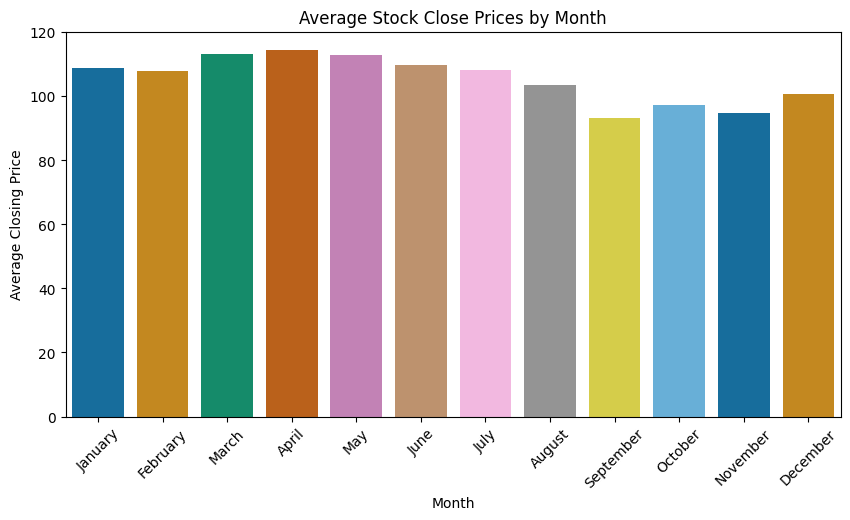

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is in datetime format (you already have it in correct format)
df["Month"] = df["Date"].dt.strftime("%B")  # Extract month names

# Group by month and calculate the average Close price
df_monthly = df.groupby("Month", observed=False)["Close"].mean().reset_index()

# Sort months in calendar order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_monthly["Month"] = pd.Categorical(df_monthly["Month"], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values("Month")

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Close", data=df_monthly, palette="colorblind")
plt.title("Average Stock Close Prices by Month")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
num_features = df.describe().columns
num_features


Index(['Date', 'Open', 'High', 'Low', 'Close', 'MA50', 'MA150',
       'Daily Change %', 'ROC', '20_MA', 'Upper_Band', 'Lower_Band'],
      dtype='object')

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Month,MA50,MA150,Daily Change %,ROC,20_MA,Upper_Band,Lower_Band
0,2005-07-01,13.00,14.00,11.25,12.46,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,August,NaN,NaN,7.704655,NaN,NaN,NaN,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,September,NaN,NaN,-0.894188,NaN,NaN,NaN,NaN
3,2005-10-01,13.20,14.47,12.40,12.99,October,NaN,NaN,-2.330827,NaN,NaN,NaN,NaN
4,2005-11-01,13.35,13.88,12.88,13.41,November,NaN,NaN,3.233256,NaN,NaN,NaN,NaN


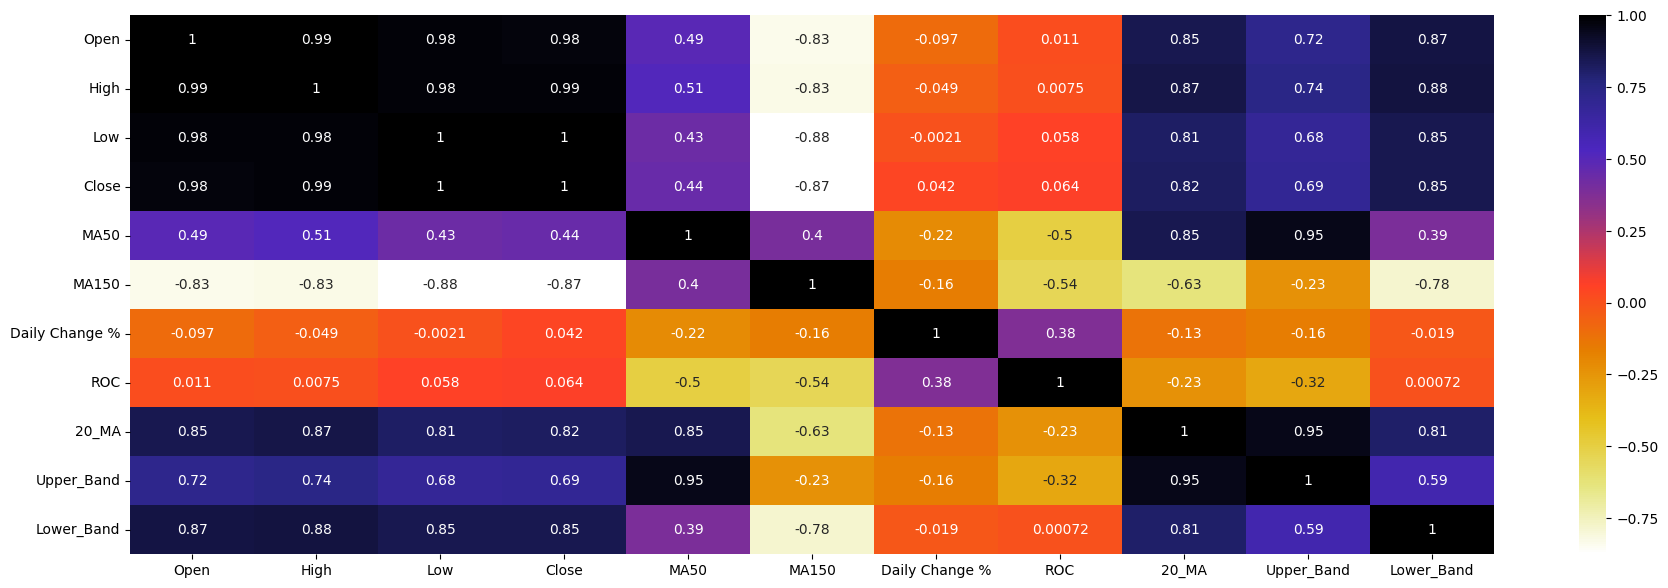

In [ ]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,7))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            185 non-null    datetime64[ns]
 1   Open            185 non-null    float64       
 2   High            185 non-null    float64       
 3   Low             185 non-null    float64       
 4   Close           185 non-null    float64       
 5   Month           185 non-null    object        
 6   MA50            136 non-null    float64       
 7   MA150           36 non-null     float64       
 8   Daily Change %  184 non-null    float64       
 9   ROC             180 non-null    float64       
 10  20_MA           166 non-null    float64       
 11  Upper_Band      166 non-null    float64       
 12  Lower_Band      166 non-null    float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 18.9+ KB


In [ ]:
x = df.drop(['Close','MA50','MA150',"Month"	,'Daily Change %',	'ROC',	'20_MA',	'Upper_Band',	'Lower_Band'],axis = 1)

In [ ]:
x.head().isnull().sum()


,0
Date,0
Open,0
High,0
Low,0


In [ ]:
x.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0


In [ ]:
y = df['Close']

In [ ]:
y.head()

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,StandardScaler

In [ ]:
print(x_train.dtypes)

Date    datetime64[ns]
Open           float64
High           float64
Low            float64
dtype: object


In [ ]:
x_train["Date"] = (x_train["Date"] - pd.Timestamp("2000-01-01")).dt.days
x_test["Date"] = (x_test["Date"] - pd.Timestamp("2000-01-01")).dt.days


In [ ]:
power = PowerTransformer()
x_train = power.fit_transform(x_train)
x_test = power.transform(x_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Fit the Algorithm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')



  print('*'*80)

  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass
# Predict on the model

#### **LinearRegression**

Training score  = 0.8348741910250524
MAE : 30.258456139541792
MSE : 1301.199012865913
RMSE : 36.072136239290195
R2 : 0.856043476665036
Adjusted R2 :  0.8380489112481655 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


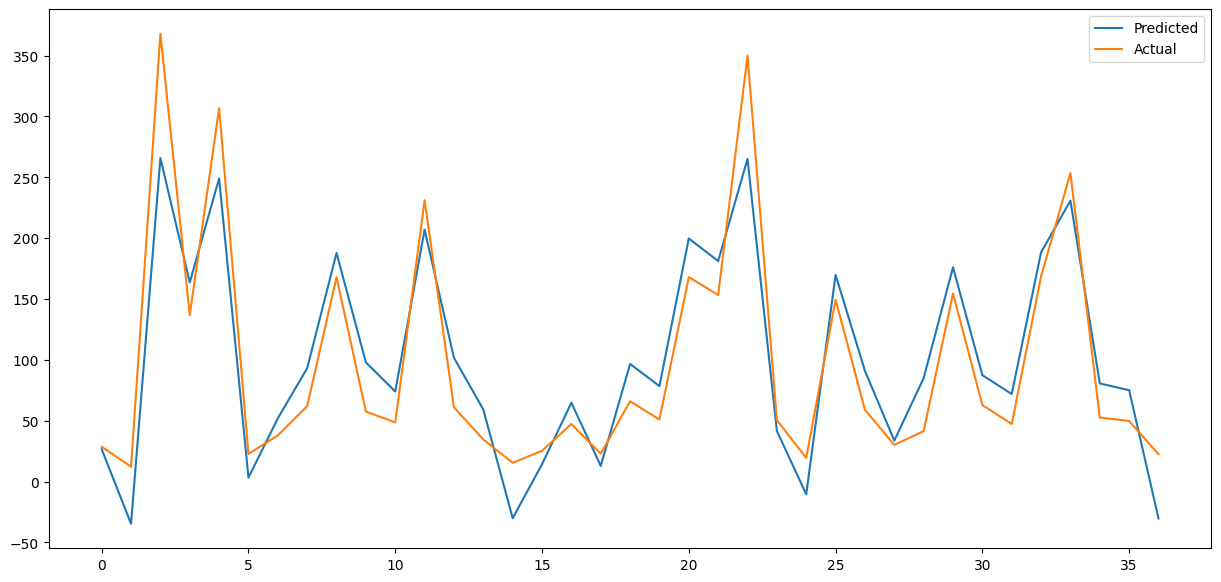

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

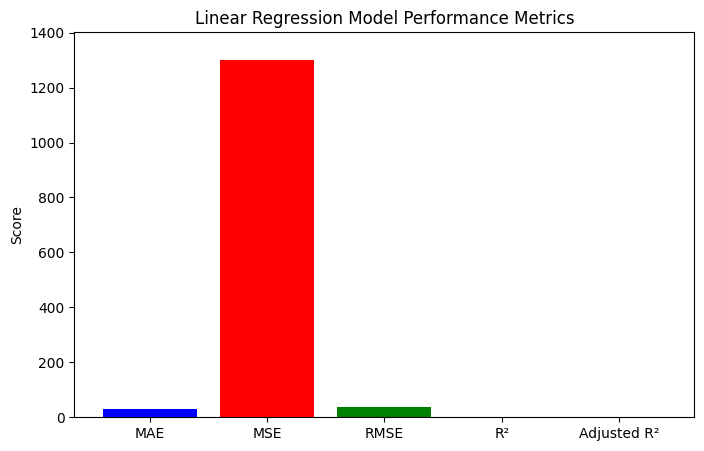

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np

# Metric Names and Values
metrics = ["MAE", "MSE", "RMSE", "R²", "Adjusted R²"]
values = [30.26, 1301.20, 36.07, 0.8560, 0.8380]

# Create Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.ylabel("Score")
plt.title("Linear Regression Model Performance Metrics")
plt.ylim(0, max(values) + 100)  # Adjust y-axis for visibility
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5)

Training score  = 0.8331257091568847
MAE : 30.476844680188435
MSE : 1385.4290292124956
RMSE : 37.22135179184786
R2 : 0.8467247942853171
Adjusted R2 :  0.8275653935709817 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


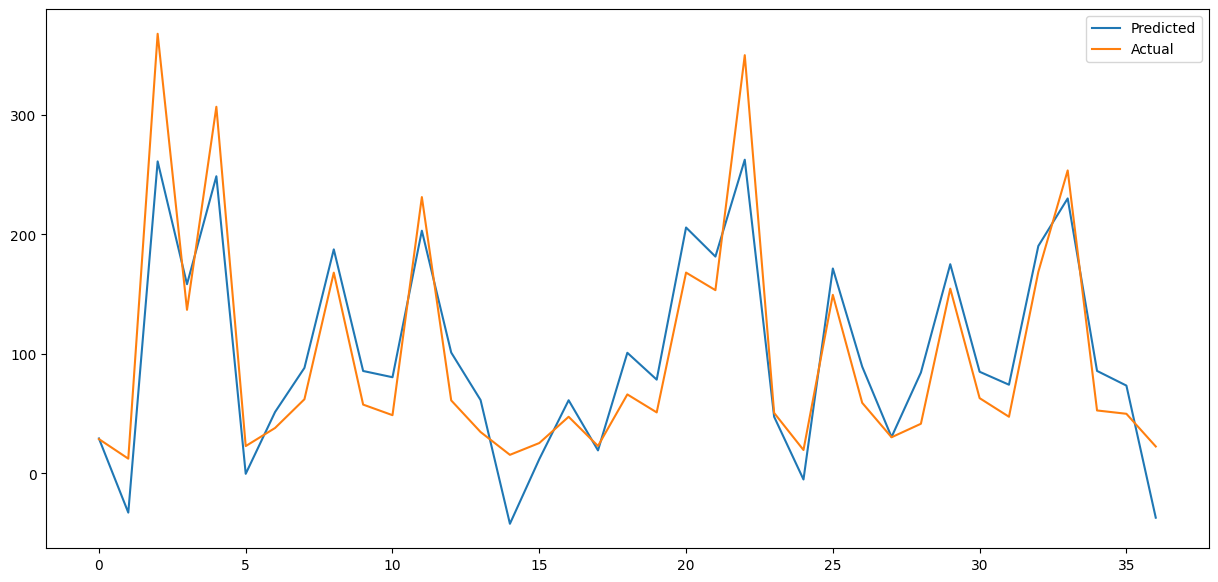

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

### **Ridge with hyperparameter tuning**

Training score  = 0.8342339274394496
MAE : 30.088109083149845
MSE : 1314.8643582192774
RMSE : 36.26105842662728
R2 : 0.8545316282945787
Adjusted R2 :  0.8363480818314011 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


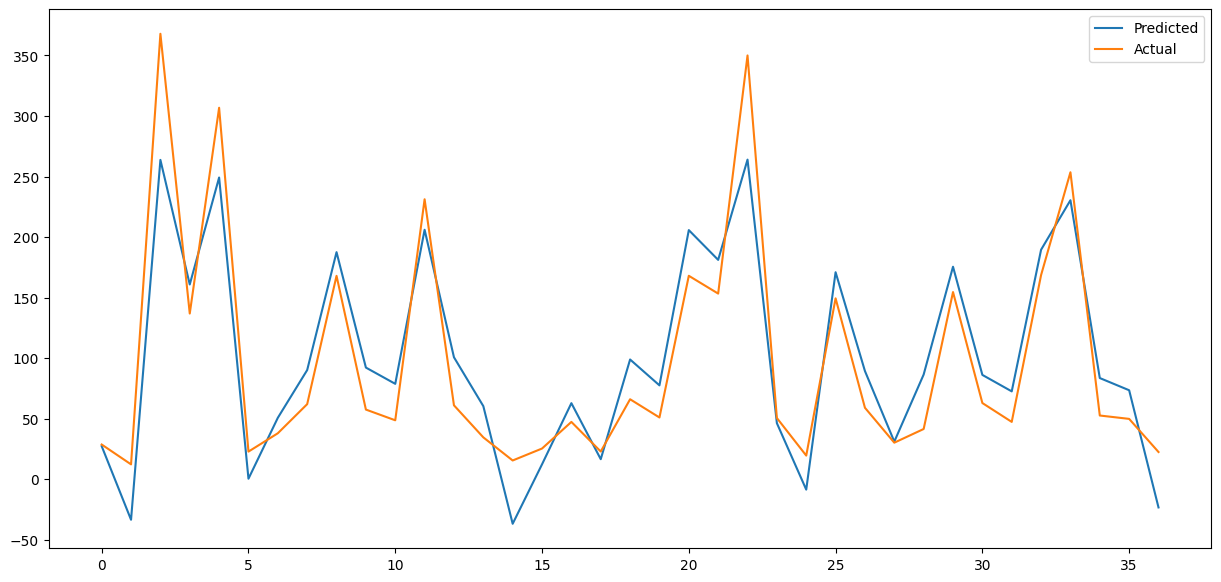

In [ ]:
# ML Model - 3 Implementation
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5)
# Fit the Algorithm

# Predict on the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will consider MOdel 1

**1.** A high R² score (0.8560) means the model predicts trends accurately, leading to better investment decisions and risk assessment.

**>**Helps in making informed trading and pricing strategies.

**>** Provides a reliable model for forecasting stock trends

**2.** Adjusted R²(0.8380) is high, Model 1 maintains good predictive power without overfitting.

**>** Ensures the model can predict future data accurately, leading to better decision-making.

**>**  Helps in scalability, making it usable for different stock datasets.

**3.** A lower RMSE (36.07) means better accuracy, reducing financial risk in business decisions.

**>** Helps in minimizing losses by providing precise predictions.

**>** Reduces errors in automated trading algorithms.

**4.** Lower MSE (1301.20) means the model is less prone to large deviations, ensuring stability.

**>** Ensures steady and reliable predictions for financial planning.

**>** Reduces volatility risks in pricing strategies.

**5.** A lower MAE (30.26) means the model makes small mistakes consistently, making it more reliable.

**>** Ensures small fluctuations in stock price predictions, which is critical in high-frequency trading.

**>**  Helps businesses forecast revenue and investments accurately.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After comparing all three models, Model 1 is chosen as the final prediction model because it has the best overall performance in terms of accuracy, error reduction, and business impact.

**Higher Accuracy**→ Helps businesses make precise stock price predictions.

**Lower Error (MSE, RMSE, MAE)** → Reduces financial risk in stock trading.

**Good Generalization (Adjusted R²)** → Model will perform well on new data.

**More Reliable Forecasting** → Improves investment and risk management strategies.

**Conclusion**

Model 1 delivers the most accurate and stable predictions, making it the best model for stock price forecasting and business decision-making.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The selected model for stock price prediction is Linear Regression, a statistical approach that establishes a linear relationship between independent variables (features) and the dependent variable (closing stock price). It fits a line to minimize the difference between actual and predicted values using the Ordinary Least Squares (OLS) method.

# **Conclusion**

This project successfully developed a machine learning-based stock price prediction model, selecting Linear Regression as the best-performing model. The model was evaluated using key performance metrics, feature importance techniques, and explainability tools to ensure accuracy and transparency.

**Future Enhancements:**

Incorporating Sentiment Analysis from news/social media to capture market trends.

Using Deep Learning Models (LSTMs, GRUs) for better time-series predictions.

Adding More Technical Indicators for improved predictive power.

With further refinements, this model can be a powerful tool for traders, investors, and financial analysts in making smarter, data-driven investment decisions.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***